In [1]:
import gym
import collections
import numpy as np
import torch

In [2]:
%load_ext autoreload
%autoreload 1
%aimport double_dqn_agent
from double_dqn_agent import DQNAgent

In [3]:
import gfootball

In [4]:
env = gym.make("GFootball-11_vs_11_kaggle-simple115v2-v0")

In [5]:
observation_shape = env.observation_space.shape
n_actions = env.action_space.n
print(observation_shape,n_actions)

(115,) 19


In [6]:
input_size = observation_shape[0]
input_size

115

In [7]:
agent = DQNAgent(input_size,n_actions,seed=42)

In [8]:
from collections import deque

In [9]:
def dqn(agent=agent,n_episodes=500, n_steps=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
        brain_name (str): brain name obtained from the unity environment
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon

    episode_rewards= []
    episode_actions = []
    
    for ep in range(1, n_episodes+1):

        obs = env.reset()
        score = 0   
        for t in range(n_steps):
            action = agent.act(obs, eps).astype(np.int32) # use the agent to select an action
            obs, rew, done, info = env.step(action) 
            score += rew
            if done:
                break 
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon

        print('\rEpisode {}\tAverage Score: {:.2f}'.format(ep, np.mean(scores_window)), end="")
        if ep % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(ep, np.mean(scores_window)))
    
    print('Training Finished. Saving Model Weights...')
    torch.save(agent.local_net.state_dict(),'double-dqn-test.pth')
    return scores

In [10]:
scores = dqn(agent=agent)

Episode 100	Average Score: -0.92
Episode 200	Average Score: -1.01
Episode 300	Average Score: -0.71
Episode 400	Average Score: -0.83
Episode 500	Average Score: -0.92
Training Finished. Saving Model Weights...


In [11]:
import matplotlib.pyplot as plt

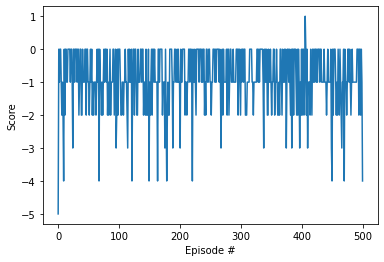

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [13]:
from kaggle_environments.envs.football.helpers import *

In [14]:
agent = DQNAgent(state_size=115,action_size=19,seed=0)

In [15]:
agent.local_net.load_state_dict(torch.load('double-dqn-test.pth'))

<All keys matched successfully>

In [16]:
from kaggle_environments import make

In [31]:
from kaggle_environments import make
env = make("football", configuration={"save_video": True, "scenario_name": "11_vs_11_easy_stochastic", "running_in_notebook": True})
env.run(["./main.py", "do_nothing"])
env.render(mode="human", width=800, height=600)